In [1]:
import numpy
import xarray
import matplotlib
import matplotlib.pyplot as mp
import datetime
import matplotlib.colors
import pandas
import matplotlib.patches
import netCDF4
import glob
import cmocean
import astropy.convolution

import mpl_toolkits
import cartopy

DEGREE_SIGN = u'\u00B0'
mp.rcParams.update({'mathtext.default': 'regular'})

In [2]:
run_info = 'FMAASO'
skip_time = 24

# import FMAASO 400 data

In [3]:
root_dir = '/beegfs/DATA/pritchard/blangenb/WRF_ARCHIVE/CHEYENNE/FMAASO/400/ens_mean_wrfout_files'
file_list = glob.glob(root_dir+'/'+'wrfout*.nc')
ds_list = [netCDF4.Dataset(file) for file in file_list]

In [4]:
cont_mfds = xarray.open_mfdataset(root_dir + '/' + 'wrfout*.nc')

In [5]:
rainc_400 = cont_mfds['RAINC'].values
rainnc_400 = cont_mfds['RAINNC'].values
qvapor_400 = cont_mfds['QVAPOR'].values
lh_400 = cont_mfds['LH'].values

pblh_400 = cont_mfds['PBLH'].values
t2_400 = cont_mfds['T2'].values

In [6]:
ecan_400 = cont_mfds['ECAN'].values*86400. # mm/day
edir_400 = cont_mfds['EDIR'].values*86400.
etran_400 = cont_mfds['ETRAN'].values*86400.

In [7]:
time = cont_mfds['Times'].values
xlat = cont_mfds['XLAT'].values[0,:,:]
xlong = cont_mfds['XLONG'].values[0,:,:]
landmask = cont_mfds['LANDMASK'].values[0,:,:]
landmask_midpoints = landmask[1:,1:]

In [8]:
prw_400 = numpy.load('DATA_prw_400.npy')

# import FMAASO 1000 data

In [9]:
root_dir = '/beegfs/DATA/pritchard/blangenb/WRF_ARCHIVE/CHEYENNE/FMAASO/1000/ens_mean_wrfout_files'
file_list = glob.glob(root_dir+'/'+'wrfout*.nc')
ds_list = [netCDF4.Dataset(file) for file in file_list]

In [10]:
phys_mfds = xarray.open_mfdataset(root_dir + '/' + 'wrfout*.nc')

In [11]:
rainc_1000 = phys_mfds['RAINC'].values
rainnc_1000 = phys_mfds['RAINNC'].values
qvapor_1000 = phys_mfds['QVAPOR'].values
lh_1000 = phys_mfds['LH'].values

pblh_1000 = phys_mfds['PBLH'].values
t2_1000 = phys_mfds['T2'].values

In [12]:
ecan_1000 = phys_mfds['ECAN'].values*86400. # mm/day
edir_1000 = phys_mfds['EDIR'].values*86400.
etran_1000 = phys_mfds['ETRAN'].values*86400.

In [13]:
prw_1000 = numpy.load('DATA_prw_1000.npy')

# get time stamps

In [14]:
time_datetimes = pandas.to_datetime([i.decode('utf-8') for i in time], format = '%Y-%m-%d_%H:%M:%S')

In [15]:
skip_time = 24
n_intervals = 8
hour_strings = ['00','03','06','09','12','15','18','21']

times_00 = [t.hour in [23,0,1] for t in time_datetimes[skip_time:]]
times_03 = [t.hour in [2,3,4] for t in time_datetimes[skip_time:]]
times_06 = [t.hour in [5,6,7] for t in time_datetimes[skip_time:]]
times_09 = [t.hour in [8,9,10] for t in time_datetimes[skip_time:]]
times_12 = [t.hour in [11,12,13] for t in time_datetimes[skip_time:]]
times_15 = [t.hour in [14,15,16] for t in time_datetimes[skip_time:]]
times_18 = [t.hour in [17,18,19] for t in time_datetimes[skip_time:]]
times_21 = [t.hour in [20,21,22] for t in time_datetimes[skip_time:]]

# PRW differences

In [16]:
prw_diffs = prw_1000-prw_400
prw_diffs_time_mean = numpy.mean(prw_diffs[skip_time:,:,:], axis=0)
prw_400_time_mean = numpy.mean(prw_400[skip_time:,:,:], axis=0)

prw_diffs_time_mean_landmask = numpy.copy(prw_diffs_time_mean)
prw_diffs_time_mean_landmask[landmask==0] = numpy.nan

prw_400_time_mean_landmask = numpy.copy(prw_400_time_mean)
prw_400_time_mean_landmask[landmask==0] = numpy.nan

# PBLH differences

In [17]:
pblh_diffs = pblh_1000-pblh_400
pblh_diffs_time_mean = numpy.mean(pblh_diffs[skip_time:,:,:], axis=0)
pblh_400_time_mean = numpy.mean(pblh_400[skip_time:,:,:], axis=0)

pblh_diffs_landmask = numpy.copy(pblh_diffs)
pblh_diffs_landmask[:,landmask==0] = numpy.nan

pblh_400_landmask = numpy.copy(pblh_400)
pblh_400_landmask[:,landmask==0] = numpy.nan

pblh_diffs_time_mean_landmask = numpy.nanmean(pblh_diffs_landmask[skip_time:,:,:], axis=0)
pblh_400_time_mean_landmask = numpy.nanmean(pblh_400_landmask[skip_time:,:,:], axis=0)

/export/home/blangenb/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice
  # This is added back by InteractiveShellApp.init_path()
/export/home/blangenb/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: Mean of empty slice
  if sys.path[0] == '':


# LH differences

In [18]:
# monthly mean
lh_diffs_time_mean = numpy.mean(lh_1000[skip_time:,:,:] - lh_400[skip_time:,:,:], axis=0)
lh_diffs_time_mean_landmask = numpy.copy(lh_diffs_time_mean)
lh_diffs_time_mean_landmask[landmask==0] = numpy.nan

lh_400_time_mean = numpy.mean(lh_400[skip_time:,:,:], axis=0)
lh_400_time_mean_landmask = numpy.copy(lh_400_time_mean)
lh_400_time_mean_landmask[landmask==0] = numpy.nan


# RAINTOT differences

In [19]:
raintot_400 = rainc_400+rainnc_400
raintot_1000 = rainc_1000+rainnc_1000

raintot_400_diff = numpy.zeros((raintot_400.shape))*numpy.nan
raintot_400_diff[:-1,:,:] = numpy.diff(raintot_400, axis=0)#*(24./3) # convert to mm/day

raintot_1000_diff = numpy.zeros((raintot_1000.shape))*numpy.nan
raintot_1000_diff[:-1,:,:] = numpy.diff(raintot_1000, axis=0)#*(24./3) # convert to mm/day

# monthly mean
raintot_diffs_time_mean = numpy.nanmean(raintot_1000_diff[skip_time:,:,:] - raintot_400_diff[skip_time:,:,:], axis=0)
raintot_diffs_time_mean_landmask = numpy.copy(raintot_diffs_time_mean)
raintot_diffs_time_mean_landmask[landmask==0] = numpy.nan

raintot_400_time_mean = numpy.nanmean(raintot_400_diff[skip_time:,:,:], axis=0)
raintot_400_time_mean_landmask = numpy.copy(raintot_400_time_mean)
raintot_400_time_mean_landmask[landmask==0] = numpy.nan


# T2 differences

In [20]:
# monthly mean
t2_diffs_time_mean = numpy.mean(t2_1000[skip_time:,:,:] - t2_400[skip_time:,:,:], axis=0)
t2_diffs_time_mean_landmask = numpy.copy(t2_diffs_time_mean)
t2_diffs_time_mean_landmask[landmask==0] = numpy.nan

t2_400_time_mean = numpy.mean(t2_400[skip_time:,:,:], axis=0)
t2_400_time_mean_landmask = numpy.copy(t2_400_time_mean)
t2_400_time_mean_landmask[landmask==0] = numpy.nan


# ECAN differences

In [21]:
ecan_diffs_time_mean = numpy.mean(ecan_1000[skip_time:,:,:] - ecan_400[skip_time:,:,:], axis=0)
ecan_diffs_time_mean_landmask = numpy.copy(ecan_diffs_time_mean)
ecan_diffs_time_mean_landmask[landmask==0] = numpy.nan

ecan_400_time_mean = numpy.mean(ecan_400[skip_time:,:,:], axis=0)
ecan_400_time_mean_landmask = numpy.copy(ecan_400_time_mean)
ecan_400_time_mean_landmask[landmask==0] = numpy.nan


# ETRAN differences

In [22]:
etran_diffs_time_mean = numpy.mean(etran_1000[skip_time:,:,:] - etran_400[skip_time:,:,:], axis=0)
etran_diffs_time_mean_landmask = numpy.copy(etran_diffs_time_mean)
etran_diffs_time_mean_landmask[landmask==0] = numpy.nan

etran_400_time_mean = numpy.mean(etran_400[skip_time:,:,:], axis=0)
etran_400_time_mean_landmask = numpy.copy(etran_400_time_mean)
etran_400_time_mean_landmask[landmask==0] = numpy.nan


# EDIR differences

In [23]:
edir_diffs_time_mean = numpy.mean(edir_1000[skip_time:,:,:] - edir_400[skip_time:,:,:], axis=0)
edir_diffs_time_mean_landmask = numpy.copy(edir_diffs_time_mean)
edir_diffs_time_mean_landmask[landmask==0] = numpy.nan

edir_400_time_mean = numpy.mean(edir_400[skip_time:,:,:], axis=0)
edir_400_time_mean_landmask = numpy.copy(edir_400_time_mean)
edir_400_time_mean_landmask[landmask==0] = numpy.nan


precip smoothing

In [24]:
field = raintot_400_time_mean_landmask
kernel = astropy.convolution.Gaussian2DKernel(x_stddev=2)
field_convolved = astropy.convolution.convolve(field, kernel)
field_convolved[landmask==0]=numpy.nan

In [25]:
outline_color='firebrick'

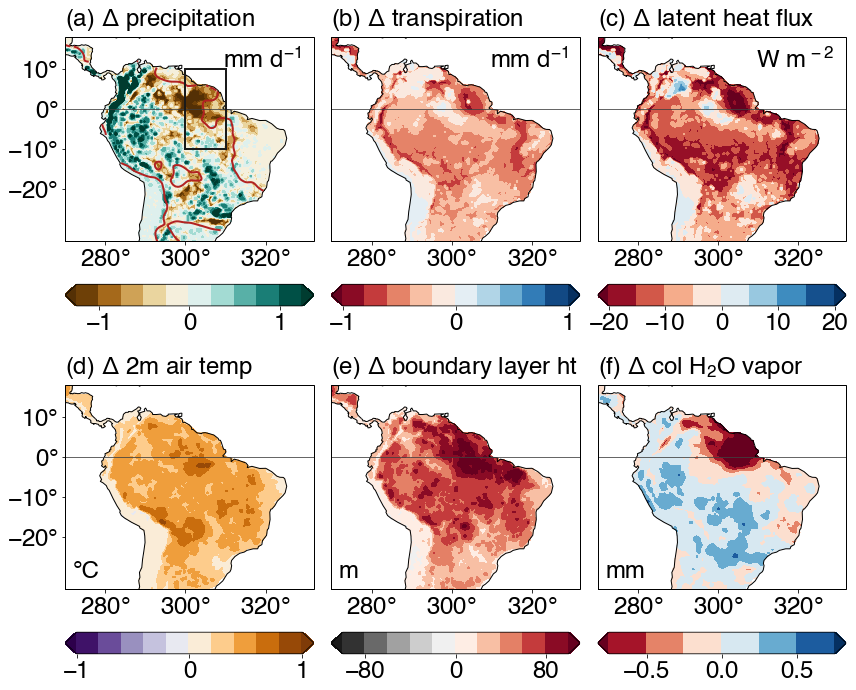

In [30]:
# MONTHLY MEAN PLOTS

fig = mp.figure(figsize=(12,10))
fontsize = 24
lon_offset=25.
xlong_max_offset=5.

# RAINTOT

levels = numpy.arange(-1.25,1.251,0.25)
ax1 = fig.add_subplot(231, projection=cartopy.crs.PlateCarree())
ax1.gridlines(ylocs=[0], color='0.25')
ax1.coastlines(resolution='110m')
contour_plot1 = ax1.contourf(xlong, xlat, raintot_diffs_time_mean_landmask*24., \
                             levels=levels, \
                             cmap='BrBG', extend='both', transform=cartopy.crs.PlateCarree())

ax1.contour(xlong,xlat,field_convolved*24.,\
            levels=[4], colors=outline_color, linewidths=[2], linestyles=['-'])

# ax1.add_patch(matplotlib.patches.Rectangle(xy=[-80, -10], width=5, height=20,
#                                 facecolor='none',
#                                 edgecolor='0.1',\
#                                 linewidth=2,\
#                                 transform=cartopy.crs.PlateCarree(), zorder=2) )

ax1.add_patch(matplotlib.patches.Rectangle(xy=[-60, -10], width=10, height=20,
                                facecolor='none',
                                edgecolor='0.1',\
                                linewidth=2,\
                                transform=cartopy.crs.PlateCarree(), zorder=2) )

# DELTA TRANSPIRATION

levels = numpy.arange(-1,1.1,0.2)
ax2 = fig.add_subplot(232, projection=cartopy.crs.PlateCarree())
ax2.gridlines(ylocs=[0], color='0.25')
ax2.coastlines(resolution='110m')
contour_plot2 = ax2.contourf(xlong, xlat, etran_diffs_time_mean_landmask, levels=levels, \
                             cmap='RdBu', extend='both', transform=cartopy.crs.PlateCarree())

# LH

levels = numpy.arange(-20,21,5)
ax3 = fig.add_subplot(233, projection=cartopy.crs.PlateCarree())
ax3.gridlines(ylocs=[0], color='0.25')
ax3.coastlines(resolution='110m')
contour_plot3 = ax3.contourf(xlong, xlat, lh_diffs_time_mean_landmask, levels=levels, \
                             cmap='RdBu', extend='both', transform=cartopy.crs.PlateCarree())

# T2

levels = numpy.arange(-1,1.1,0.2)
ax4 = fig.add_subplot(234, projection=cartopy.crs.PlateCarree())
ax4.gridlines(ylocs=[0], color='0.25')
ax4.coastlines(resolution='110m')
contour_plot4 = ax4.contourf(xlong, xlat, t2_diffs_time_mean_landmask, levels=levels, \
                             cmap='PuOr_r', extend='both', transform=cartopy.crs.PlateCarree())

# PBLH

levels = numpy.arange(-100,101,20)
ax5 = fig.add_subplot(235, projection=cartopy.crs.PlateCarree())
ax5.gridlines(ylocs=[0], color='0.25')
ax5.coastlines(resolution='110m')
contour_plot5 = ax5.contourf(xlong, xlat, pblh_diffs_time_mean_landmask, \
                             levels=levels, \
                             cmap='RdGy_r', extend='both', transform=cartopy.crs.PlateCarree())

# PRW

levels = numpy.arange(-.75,.76,0.25)
ax6 = fig.add_subplot(236, projection=cartopy.crs.PlateCarree())
ax6.gridlines(ylocs=[0], color='0.25')
ax6.coastlines(resolution='110m')
contour_plot6 = ax6.contourf(xlong, xlat, prw_diffs_time_mean_landmask, \
                             levels=levels, \
                             cmap='RdBu', extend='both', transform=cartopy.crs.PlateCarree())

# ax1.set_extent([273,329,-30,15], crs=cartopy.crs.PlateCarree())
# ax2.set_extent([273,329,-30,15], crs=cartopy.crs.PlateCarree())
# ax3.set_extent([273,329,-30,15], crs=cartopy.crs.PlateCarree())
# ax4.set_extent([273,329,-30,15], crs=cartopy.crs.PlateCarree())
# ax5.set_extent([273,329,-30,15], crs=cartopy.crs.PlateCarree())
# ax6.set_extent([273,329,-30,15], crs=cartopy.crs.PlateCarree())

offset = 3
ax1.set_extent([273-offset,329+offset,-30-offset,15+offset], crs=cartopy.crs.PlateCarree())
ax2.set_extent([273-offset,329+offset,-30-offset,15+offset], crs=cartopy.crs.PlateCarree())
ax3.set_extent([273-offset,329+offset,-30-offset,15+offset], crs=cartopy.crs.PlateCarree())
ax4.set_extent([273-offset,329+offset,-30-offset,15+offset], crs=cartopy.crs.PlateCarree())
ax5.set_extent([273-offset,329+offset,-30-offset,15+offset], crs=cartopy.crs.PlateCarree())
ax6.set_extent([273-offset,329+offset,-30-offset,15+offset], crs=cartopy.crs.PlateCarree())

ax1.set_xticks([-360+280,-360+300,-360+320])
ax1.set_yticks([-20,-10,0,10])
ax1.tick_params(labelsize=fontsize)
ax1.set_xticklabels(['$280$'+DEGREE_SIGN,'$300$'+DEGREE_SIGN,'$320$'+DEGREE_SIGN])
ax1.set_yticklabels(['$-20$'+DEGREE_SIGN,'$-10$'+DEGREE_SIGN,'$0$'+DEGREE_SIGN,'$10$'+DEGREE_SIGN])

ax2.set_xticks([-360+280,-360+300,-360+320])
ax2.set_yticks([])#-20,-10,0,10])
ax2.tick_params(labelsize=fontsize)
ax2.set_xticklabels(['$280$'+DEGREE_SIGN,'$300$'+DEGREE_SIGN,'$320$'+DEGREE_SIGN])
ax2.set_yticklabels(['$-20$'+DEGREE_SIGN,'$-10$'+DEGREE_SIGN,'$0$'+DEGREE_SIGN,'$10$'+DEGREE_SIGN])

ax3.set_xticks([-360+280,-360+300,-360+320])
ax3.set_yticks([])#-20,-10,0,10])
ax3.tick_params(labelsize=fontsize)
ax3.set_xticklabels(['$280$'+DEGREE_SIGN,'$300$'+DEGREE_SIGN,'$320$'+DEGREE_SIGN])
ax3.set_yticklabels(['$-20$'+DEGREE_SIGN,'$-10$'+DEGREE_SIGN,'$0$'+DEGREE_SIGN,'$10$'+DEGREE_SIGN])

ax4.set_xticks([-360+280,-360+300,-360+320])
ax4.set_yticks([-20,-10,0,10])
ax4.tick_params(labelsize=fontsize)
ax4.set_xticklabels(['$280$'+DEGREE_SIGN,'$300$'+DEGREE_SIGN,'$320$'+DEGREE_SIGN])
ax4.set_yticklabels(['$-20$'+DEGREE_SIGN,'$-10$'+DEGREE_SIGN,'$0$'+DEGREE_SIGN,'$10$'+DEGREE_SIGN])

ax5.set_xticks([-360+280,-360+300,-360+320])
ax5.set_yticks([])#-20,-10,0,10])
ax5.tick_params(labelsize=fontsize)
ax5.set_xticklabels(['$280$'+DEGREE_SIGN,'$300$'+DEGREE_SIGN,'$320$'+DEGREE_SIGN])
ax5.set_yticklabels(['$-20$'+DEGREE_SIGN,'$-10$'+DEGREE_SIGN,'$0$'+DEGREE_SIGN,'$10$'+DEGREE_SIGN])

ax6.set_xticks([-360+280,-360+300,-360+320])
ax6.set_yticks([])#-20,-10,0,10])
ax6.tick_params(labelsize=fontsize)
ax6.set_xticklabels(['$280$'+DEGREE_SIGN,'$300$'+DEGREE_SIGN,'$320$'+DEGREE_SIGN])
ax6.set_yticklabels(['$-20$'+DEGREE_SIGN,'$-10$'+DEGREE_SIGN,'$0$'+DEGREE_SIGN,'$10$'+DEGREE_SIGN])

fig.tight_layout(h_pad=5)#h_pad=0.5,w_pad=0.5)
fig.canvas.draw_idle()

title = ax1.text(s='(a) $\Delta$ precipitation', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax1.transAxes)
title = ax2.text(s='(b) $\Delta$ transpiration', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax2.transAxes)
title = ax3.text(s='(c) $\Delta$ latent heat flux', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax3.transAxes)
title = ax4.text(s='(d) $\Delta$ 2m air temp', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax4.transAxes)
title = ax5.text(s='(e) $\Delta$ boundary layer ht', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax5.transAxes)
title = ax6.text(s='(f) $\Delta$ col H$_2$O vapor', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax6.transAxes)

ax1.text(s='mm d$^{-1}$', x=0.95, y=0.95, \
        ha='right', va='top', \
        fontsize=fontsize, \
        transform=ax1.transAxes)
ax2.text(s='mm d$^{-1}$', x=0.95, y=0.95, \
        ha='right', va='top', \
        fontsize=fontsize, \
        transform=ax2.transAxes)
ax3.text(s='W m$^{\,-2}$', x=0.95, y=0.95, \
        ha='right', va='top', \
        fontsize=fontsize, \
        transform=ax3.transAxes)
ax4.text(s=DEGREE_SIGN+'C', x=0.03, y=0.03, \
        ha='left', va='bottom', \
        fontsize=fontsize, \
        transform=ax4.transAxes)
ax5.text(s='m', x=0.03, y=0.03, \
        ha='left', va='bottom', \
        fontsize=fontsize, \
        transform=ax5.transAxes)
ax6.text(s='mm', x=0.03, y=0.03, \
        ha='left', va='bottom', \
        fontsize=fontsize, \
        transform=ax6.transAxes)

for c in contour_plot1.collections:
    c.set_edgecolor('face')
    #c.set_rasterized(True)
for c in contour_plot2.collections:
    c.set_edgecolor('face')
    #c.set_rasterized(True)
for c in contour_plot3.collections:
    c.set_edgecolor('face')
    #c.set_rasterized(True)
for c in contour_plot4.collections:
    c.set_edgecolor('face')
    #c.set_rasterized(True)
for c in contour_plot5.collections:
    c.set_edgecolor('face')
    #c.set_rasterized(True)
for c in contour_plot6.collections:
    c.set_edgecolor('face')
    #c.set_rasterized(True)

cbar_thickness=0.03
cbar_yshift=-0.09

bbox_position = ax1.get_position()
cbar_axes = fig.add_axes([bbox_position.x0, bbox_position.y0+cbar_yshift, bbox_position.width, cbar_thickness])
cbar = mp.colorbar(contour_plot1, orientation='horizontal', cax=cbar_axes)
#cbar.set_label(label='mm day$^{-1}$', fontsize=fontsize)
cbar_axes.tick_params(labelsize=fontsize)
cbar.set_ticks([numpy.arange(-1,1.1,1)])
for c in cbar_axes.collections:
    c.set_edgecolor('face')
#     c.set_rasterized(True)

bbox_position = ax2.get_position()
cbar_axes = fig.add_axes([bbox_position.x0, bbox_position.y0+cbar_yshift, bbox_position.width, cbar_thickness])
cbar = mp.colorbar(contour_plot2, orientation='horizontal', cax=cbar_axes)
cbar.set_ticks([numpy.arange(-1,1.1,1)])
cbar_axes.tick_params(labelsize=fontsize)
for c in cbar_axes.collections:
    c.set_edgecolor('face')
#     c.set_rasterized(True)

bbox_position = ax3.get_position()
cbar_axes = fig.add_axes([bbox_position.x0, bbox_position.y0+cbar_yshift, bbox_position.width, cbar_thickness])
cbar = mp.colorbar(contour_plot3, orientation='horizontal', cax=cbar_axes)
#cbar.set_label(label='W m$^{-2}$', fontsize=fontsize)
cbar_axes.tick_params(labelsize=fontsize)
cbar.set_ticks(numpy.arange(-20,21,10))
for c in cbar_axes.collections:
    c.set_edgecolor('face')
#     c.set_rasterized(True)

bbox_position = ax4.get_position()
cbar_axes = fig.add_axes([bbox_position.x0, bbox_position.y0+cbar_yshift, bbox_position.width, cbar_thickness])
cbar = mp.colorbar(contour_plot4, orientation='horizontal', cax=cbar_axes)
cbar.set_ticks([numpy.arange(-1,1.1,1)])
cbar_axes.tick_params(labelsize=fontsize)
for c in cbar_axes.collections:
    c.set_edgecolor('face')
#     c.set_rasterized(True)

bbox_position = ax5.get_position()
cbar_axes = fig.add_axes([bbox_position.x0, bbox_position.y0+cbar_yshift, bbox_position.width, cbar_thickness])
cbar = mp.colorbar(contour_plot5, orientation='horizontal', cax=cbar_axes)
cbar.set_ticks([-80,0,80])
cbar_axes.tick_params(labelsize=fontsize)
for c in cbar_axes.collections:
    c.set_edgecolor('face')
#     c.set_rasterized(True)

bbox_position = ax6.get_position()
cbar_axes = fig.add_axes([bbox_position.x0, bbox_position.y0+cbar_yshift, bbox_position.width, cbar_thickness])
cbar = mp.colorbar(contour_plot6, orientation='horizontal', cax=cbar_axes)
#cbar.set_label(label=degree_sign+'C', fontsize=fontsize)
cbar_axes.tick_params(labelsize=fontsize)
cbar.set_ticks([-.5,0,.5])

for c in cbar_axes.collections:
    c.set_edgecolor('face')
#     c.set_rasterized(True)

fig.savefig('../figures/POSTER_10d_map_changes.pdf', transparent=True, bbox_inches='tight')

# plot climatology of these variables

/export/home/blangenb/miniconda3/lib/python3.7/site-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'rasterized'
  s)


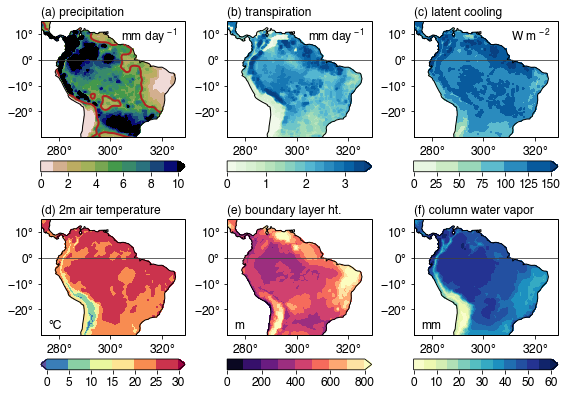

In [27]:
# MONTHLY MEAN PLOTS

fig = mp.figure(figsize=(8,6))
fontsize = 12
lon_offset = 25.

# RAINTOT

levels = numpy.arange(0,10.1,1.)
ax1 = fig.add_subplot(231, projection=cartopy.crs.PlateCarree())
ax1.gridlines(ylocs=[0], color='0.25')
ax1.coastlines(resolution='110m')
ax1.set_extent([xlong.min(), xlong.max(), xlat.min(), xlat.max()], crs=cartopy.crs.PlateCarree())
contour_plot1 = ax1.contourf(xlong, xlat, raintot_400_time_mean_landmask*24., \
                             levels=levels, \
                             cmap='gist_earth_r', extend='max', transform=cartopy.crs.PlateCarree(), rasterized=True)

ax1.contour(xlong,xlat,field_convolved*24.,\
            levels=[4], colors=outline_color, linewidths=[2], linestyles=['-'])

# DELTA TRANSPIRATION

levels = numpy.arange(0,3.51,0.25)
ax2 = fig.add_subplot(232, projection=cartopy.crs.PlateCarree())
ax2.gridlines(ylocs=[0], color='0.25')
ax2.coastlines(resolution='110m')
ax2.set_extent([xlong.min(), xlong.max(), xlat.min(), xlat.max()], crs=cartopy.crs.PlateCarree())
contour_plot2 = ax2.contourf(xlong, xlat, etran_400_time_mean_landmask, \
                             levels=levels, \
                             cmap='GnBu', extend='max', transform=cartopy.crs.PlateCarree(), rasterized=True)

# LH

levels = numpy.arange(0,151,25)
ax3 = fig.add_subplot(233, projection=cartopy.crs.PlateCarree())
ax3.gridlines(ylocs=[0], color='0.25')
ax3.coastlines(resolution='110m')
ax3.set_extent([xlong.min(), xlong.max(), xlat.min(), xlat.max()], crs=cartopy.crs.PlateCarree())
contour_plot3 = ax3.contourf(xlong, xlat, lh_400_time_mean_landmask, \
                             levels=levels, \
                             cmap='GnBu', extend='max', transform=cartopy.crs.PlateCarree(), rasterized=True)

# T2

levels = numpy.arange(0,31,5)
ax4 = fig.add_subplot(234, projection=cartopy.crs.PlateCarree())
ax4.gridlines(ylocs=[0], color='0.25')
ax4.coastlines(resolution='110m')
ax4.set_extent([xlong.min(), xlong.max(), xlat.min(), xlat.max()], crs=cartopy.crs.PlateCarree())
contour_plot4 = ax4.contourf(xlong, xlat, t2_400_time_mean_landmask-273.15, \
                             levels=levels, \
                             cmap='Spectral_r', extend='both', transform=cartopy.crs.PlateCarree(), rasterized=True)

# PBLH

levels = numpy.arange(0,801,100)
ax5 = fig.add_subplot(235, projection=cartopy.crs.PlateCarree())
ax5.gridlines(ylocs=[0], color='0.25')
ax5.coastlines(resolution='110m')
ax5.set_extent([xlong.min(), xlong.max(), xlat.min(), xlat.max()], crs=cartopy.crs.PlateCarree())
contour_plot5 = ax5.contourf(xlong, xlat, pblh_400_time_mean_landmask, \
                             levels=levels, \
                             cmap='magma', extend='max', transform=cartopy.crs.PlateCarree(), rasterized=True)

# prw

levels = numpy.arange(0,61,5)
ax6 = fig.add_subplot(236, projection=cartopy.crs.PlateCarree())
ax6.gridlines(ylocs=[0], color='0.25')
ax6.coastlines(resolution='110m')
ax6.set_extent([xlong.min(), xlong.max(), xlat.min(), xlat.max()], crs=cartopy.crs.PlateCarree())
contour_plot6 = ax6.contourf(xlong, xlat, prw_400_time_mean_landmask, \
                             levels=levels, \
                             cmap='YlGnBu', extend='max', transform=cartopy.crs.PlateCarree(), rasterized=True)

ax1.set_extent([273,329,-30,15], crs=cartopy.crs.PlateCarree())
ax2.set_extent([273,329,-30,15], crs=cartopy.crs.PlateCarree())
ax3.set_extent([273,329,-30,15], crs=cartopy.crs.PlateCarree())
ax4.set_extent([273,329,-30,15], crs=cartopy.crs.PlateCarree())
ax5.set_extent([273,329,-30,15], crs=cartopy.crs.PlateCarree())
ax6.set_extent([273,329,-30,15], crs=cartopy.crs.PlateCarree())

ax1.set_xticks([-360+280,-360+300,-360+320])
ax1.set_yticks([-20,-10,0,10])
ax1.tick_params(labelsize=fontsize)
ax1.set_xticklabels(['$280$'+DEGREE_SIGN,'$300$'+DEGREE_SIGN,'$320$'+DEGREE_SIGN])
ax1.set_yticklabels(['$-20$'+DEGREE_SIGN,'$-10$'+DEGREE_SIGN,'$0$'+DEGREE_SIGN,'$10$'+DEGREE_SIGN])

ax2.set_xticks([-360+280,-360+300,-360+320])
ax2.set_yticks([-20,-10,0,10])
ax2.tick_params(labelsize=fontsize)
ax2.set_xticklabels(['$280$'+DEGREE_SIGN,'$300$'+DEGREE_SIGN,'$320$'+DEGREE_SIGN])
ax2.set_yticklabels(['$-20$'+DEGREE_SIGN,'$-10$'+DEGREE_SIGN,'$0$'+DEGREE_SIGN,'$10$'+DEGREE_SIGN])

ax3.set_xticks([-360+280,-360+300,-360+320])
ax3.set_yticks([-20,-10,0,10])
ax3.tick_params(labelsize=fontsize)
ax3.set_xticklabels(['$280$'+DEGREE_SIGN,'$300$'+DEGREE_SIGN,'$320$'+DEGREE_SIGN])
ax3.set_yticklabels(['$-20$'+DEGREE_SIGN,'$-10$'+DEGREE_SIGN,'$0$'+DEGREE_SIGN,'$10$'+DEGREE_SIGN])

ax4.set_xticks([-360+280,-360+300,-360+320])
ax4.set_yticks([-20,-10,0,10])
ax4.tick_params(labelsize=fontsize)
ax4.set_xticklabels(['$280$'+DEGREE_SIGN,'$300$'+DEGREE_SIGN,'$320$'+DEGREE_SIGN])
ax4.set_yticklabels(['$-20$'+DEGREE_SIGN,'$-10$'+DEGREE_SIGN,'$0$'+DEGREE_SIGN,'$10$'+DEGREE_SIGN])

ax5.set_xticks([-360+280,-360+300,-360+320])
ax5.set_yticks([-20,-10,0,10])
ax5.tick_params(labelsize=fontsize)
ax5.set_xticklabels(['$280$'+DEGREE_SIGN,'$300$'+DEGREE_SIGN,'$320$'+DEGREE_SIGN])
ax5.set_yticklabels(['$-20$'+DEGREE_SIGN,'$-10$'+DEGREE_SIGN,'$0$'+DEGREE_SIGN,'$10$'+DEGREE_SIGN])

ax6.set_xticks([-360+280,-360+300,-360+320])
ax6.set_yticks([-20,-10,0,10])
ax6.tick_params(labelsize=fontsize)
ax6.set_xticklabels(['$280$'+DEGREE_SIGN,'$300$'+DEGREE_SIGN,'$320$'+DEGREE_SIGN])
ax6.set_yticklabels(['$-20$'+DEGREE_SIGN,'$-10$'+DEGREE_SIGN,'$0$'+DEGREE_SIGN,'$10$'+DEGREE_SIGN])

fig.tight_layout(h_pad=0.5,w_pad=0.5)
fig.canvas.draw_idle()

title = ax1.text(s='(a) precipitation', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax1.transAxes)
title = ax2.text(s='(b) transpiration', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax2.transAxes)
title = ax3.text(s='(c) latent cooling', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax3.transAxes)
title = ax4.text(s='(d) 2m air temperature', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax4.transAxes)
title = ax5.text(s='(e) boundary layer ht.', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax5.transAxes)
title = ax6.text(s='(f) column water vapor', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax6.transAxes)

ax1.text(s='mm day$^{\,-1}$', x=0.95, y=0.95, \
        ha='right', va='top', \
        fontsize=fontsize, \
        transform=ax1.transAxes)
ax2.text(s='mm day$^{\,-1}$', x=0.95, y=0.95, \
        ha='right', va='top', \
        fontsize=fontsize, \
        transform=ax2.transAxes)
ax3.text(s='W m$^{\,-2}$', x=0.95, y=0.95, \
        ha='right', va='top', \
        fontsize=fontsize, \
        transform=ax3.transAxes)
ax4.text(s=DEGREE_SIGN+'C', x=0.05, y=0.03, \
        ha='left', va='bottom', \
        fontsize=fontsize, \
        transform=ax4.transAxes)
ax5.text(s='m', x=0.05, y=0.03, \
        ha='left', va='bottom', \
        fontsize=fontsize, \
        transform=ax5.transAxes)
ax6.text(s='mm', x=0.05, y=0.03, \
        ha='left', va='bottom', \
        fontsize=fontsize, \
        transform=ax6.transAxes)

for c in contour_plot1.collections:
    c.set_edgecolor('face')
    c.set_rasterized(True)
for c in contour_plot2.collections:
    c.set_edgecolor('face')
    c.set_rasterized(True)
for c in contour_plot3.collections:
    c.set_edgecolor('face')
    c.set_rasterized(True)
for c in contour_plot4.collections:
    c.set_edgecolor('face')
    c.set_rasterized(True)
for c in contour_plot5.collections:
    c.set_edgecolor('face')
    c.set_rasterized(True)
for c in contour_plot6.collections:
    c.set_edgecolor('face')
    c.set_rasterized(True)


cbar_thickness=0.025
cbar_yshift=-0.08

bbox_position = ax1.get_position()
cbar_axes = fig.add_axes([bbox_position.x0, bbox_position.y0+cbar_yshift, bbox_position.width, cbar_thickness], rasterized=True)
cbar = mp.colorbar(contour_plot1, orientation='horizontal', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
#cbar.set_ticks([numpy.arange(-1,1.1,0.5)])
for c in cbar_axes.collections:
    c.set_edgecolor('face')

bbox_position = ax2.get_position()
cbar_axes = fig.add_axes([bbox_position.x0, bbox_position.y0+cbar_yshift, bbox_position.width, cbar_thickness], rasterized=True)
cbar = mp.colorbar(contour_plot2, orientation='horizontal', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
cbar.set_ticks([0,1,2,3])
for c in cbar_axes.collections:
    c.set_edgecolor('face')

bbox_position = ax3.get_position()
cbar_axes = fig.add_axes([bbox_position.x0, bbox_position.y0+cbar_yshift, bbox_position.width, cbar_thickness], rasterized=True)
cbar = mp.colorbar(contour_plot3, orientation='horizontal', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
#cbar.set_ticks(numpy.arange(-20,21,10))
for c in cbar_axes.collections:
    c.set_edgecolor('face')

bbox_position = ax4.get_position()
cbar_axes = fig.add_axes([bbox_position.x0, bbox_position.y0+cbar_yshift, bbox_position.width, cbar_thickness], rasterized=True)
cbar = mp.colorbar(contour_plot4, orientation='horizontal', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
#cbar.set_ticks(numpy.arange(280,301,5))
for c in cbar_axes.collections:
    c.set_edgecolor('face')

bbox_position = ax5.get_position()
cbar_axes = fig.add_axes([bbox_position.x0, bbox_position.y0+cbar_yshift, bbox_position.width, cbar_thickness], rasterized=True)
cbar = mp.colorbar(contour_plot5, orientation='horizontal', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
cbar.set_ticks([0,200,400,600,800])
for c in cbar_axes.collections:
    c.set_edgecolor('face')

bbox_position = ax6.get_position()
cbar_axes = fig.add_axes([bbox_position.x0, bbox_position.y0+cbar_yshift, bbox_position.width, cbar_thickness], rasterized=True)
cbar = mp.colorbar(contour_plot6, orientation='horizontal', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
#cbar.set_ticks(numpy.arange(-0.2,0.21,0.1))
for c in cbar_axes.collections:
    c.set_edgecolor('face')

#fig.savefig(run_info+'_figure2.pdf', transparent=True, bbox_inches='tight')
#fig.savefig('../figures/SI_fig03.pdf', dpi=300, transparent=True, bbox_inches='tight')

# as a percent

/export/home/blangenb/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/export/home/blangenb/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/export/home/blangenb/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in true_divide
/export/home/blangenb/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide
/export/home/blangenb/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in true_divide
/export/home/blangenb/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in true_divide


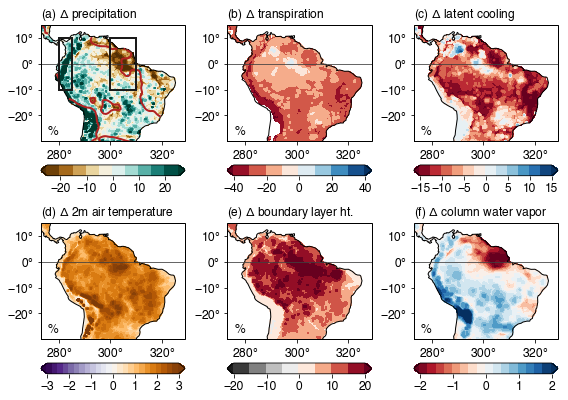

In [28]:
# MONTHLY MEAN PLOTS

fig = mp.figure(figsize=(8,6))
fontsize = 12
lon_offset = 25.

# RAINTOT

perc_diff = (raintot_diffs_time_mean_landmask/raintot_400_time_mean_landmask)*100.
levels = numpy.arange(-25,26,5)
ax1 = fig.add_subplot(231, projection=cartopy.crs.PlateCarree())
ax1.gridlines(ylocs=[0], color='0.25')
ax1.coastlines(resolution='110m')
contour_plot1 = ax1.contourf(xlong, xlat, perc_diff, \
                             levels=levels, \
                             cmap='BrBG', extend='both', transform=cartopy.crs.PlateCarree(), rasterized=True)


ax1.add_patch(matplotlib.patches.Rectangle(xy=[-80, -10], width=5, height=20,
                                facecolor='none',
                                edgecolor='0.1',\
                                linewidth=2,\
                                transform=cartopy.crs.PlateCarree(), zorder=2) )

ax1.add_patch(matplotlib.patches.Rectangle(xy=[-60, -10], width=10, height=20,
                                facecolor='none',
                                edgecolor='0.1',\
                                linewidth=2,\
                                transform=cartopy.crs.PlateCarree(), zorder=2) )

ax1.contour(xlong,xlat,field_convolved*24.,\
            levels=[4], colors=outline_color, linewidths=[2], linestyles=['-'])

# DELTA TRANSPIRATION

perc_diff = (etran_diffs_time_mean_landmask/etran_400_time_mean_landmask)*100.
levels = numpy.arange(-40,41,10)
ax2 = fig.add_subplot(232, projection=cartopy.crs.PlateCarree())
ax2.gridlines(ylocs=[0], color='0.25')
ax2.coastlines(resolution='110m')
contour_plot2 = ax2.contourf(xlong, xlat, perc_diff, \
                             levels=levels, \
                             cmap='RdBu', extend='both', transform=cartopy.crs.PlateCarree(), rasterized=True)

# LH

perc_diff = (lh_diffs_time_mean_landmask/lh_400_time_mean_landmask)*100.
levels = numpy.arange(-15,16,2.5)
ax3 = fig.add_subplot(233, projection=cartopy.crs.PlateCarree())
ax3.gridlines(ylocs=[0], color='0.25')
ax3.coastlines(resolution='110m')
contour_plot3 = ax3.contourf(xlong, xlat, perc_diff, \
                             levels=levels, \
                             cmap='RdBu', extend='both', transform=cartopy.crs.PlateCarree(), rasterized=True)

# T2

perc_diff = (t2_diffs_time_mean_landmask/(t2_400_time_mean_landmask-273.15))*100.
levels = numpy.arange(-3,3.1,0.25)
ax4 = fig.add_subplot(234, projection=cartopy.crs.PlateCarree())
ax4.gridlines(ylocs=[0], color='0.25')
ax4.coastlines(resolution='110m')
contour_plot4 = ax4.contourf(xlong, xlat, perc_diff, \
                             levels=levels, \
                             cmap='PuOr_r', extend='both', transform=cartopy.crs.PlateCarree(), rasterized=True)

# PBLH

perc_diff = (pblh_diffs_time_mean_landmask/pblh_400_time_mean_landmask)*100.
levels = numpy.arange(-20,21,5)
ax5 = fig.add_subplot(235, projection=cartopy.crs.PlateCarree())
ax5.gridlines(ylocs=[0], color='0.25')
ax5.coastlines(resolution='110m')
contour_plot5 = ax5.contourf(xlong, xlat, perc_diff, \
                             levels=levels, \
                             cmap='RdGy_r', extend='both', transform=cartopy.crs.PlateCarree(), rasterized=True)

# PRW

perc_diff = (prw_diffs_time_mean_landmask/prw_400_time_mean_landmask)*100.
levels = numpy.arange(-2,2.1,0.25)
ax6 = fig.add_subplot(236, projection=cartopy.crs.PlateCarree())
ax6.gridlines(ylocs=[0], color='0.25')
ax6.coastlines(resolution='110m')
contour_plot6 = ax6.contourf(xlong, xlat, perc_diff, \
                             levels=levels, \
                             cmap='RdBu', extend='both', transform=cartopy.crs.PlateCarree(), rasterized=True)

for c in contour_plot1.collections:
    c.set_edgecolor('face')
    c.set_rasterized(True)
for c in contour_plot2.collections:
    c.set_edgecolor('face')
    c.set_rasterized(True)
for c in contour_plot3.collections:
    c.set_edgecolor('face')
    c.set_rasterized(True)
for c in contour_plot4.collections:
    c.set_edgecolor('face')
    c.set_rasterized(True)
for c in contour_plot5.collections:
    c.set_edgecolor('face')
    c.set_rasterized(True)
for c in contour_plot6.collections:
    c.set_edgecolor('face')
    c.set_rasterized(True)

ax1.set_extent([273,329,-30,15], crs=cartopy.crs.PlateCarree())
ax2.set_extent([273,329,-30,15], crs=cartopy.crs.PlateCarree())
ax3.set_extent([273,329,-30,15], crs=cartopy.crs.PlateCarree())
ax4.set_extent([273,329,-30,15], crs=cartopy.crs.PlateCarree())
ax5.set_extent([273,329,-30,15], crs=cartopy.crs.PlateCarree())
ax6.set_extent([273,329,-30,15], crs=cartopy.crs.PlateCarree())

ax1.set_xticks([-360+280,-360+300,-360+320])
ax1.set_yticks([-20,-10,0,10])
ax1.tick_params(labelsize=fontsize)
ax1.set_xticklabels(['$280$'+DEGREE_SIGN,'$300$'+DEGREE_SIGN,'$320$'+DEGREE_SIGN])
ax1.set_yticklabels(['$-20$'+DEGREE_SIGN,'$-10$'+DEGREE_SIGN,'$0$'+DEGREE_SIGN,'$10$'+DEGREE_SIGN])

ax2.set_xticks([-360+280,-360+300,-360+320])
ax2.set_yticks([-20,-10,0,10])
ax2.tick_params(labelsize=fontsize)
ax2.set_xticklabels(['$280$'+DEGREE_SIGN,'$300$'+DEGREE_SIGN,'$320$'+DEGREE_SIGN])
ax2.set_yticklabels(['$-20$'+DEGREE_SIGN,'$-10$'+DEGREE_SIGN,'$0$'+DEGREE_SIGN,'$10$'+DEGREE_SIGN])

ax3.set_xticks([-360+280,-360+300,-360+320])
ax3.set_yticks([-20,-10,0,10])
ax3.tick_params(labelsize=fontsize)
ax3.set_xticklabels(['$280$'+DEGREE_SIGN,'$300$'+DEGREE_SIGN,'$320$'+DEGREE_SIGN])
ax3.set_yticklabels(['$-20$'+DEGREE_SIGN,'$-10$'+DEGREE_SIGN,'$0$'+DEGREE_SIGN,'$10$'+DEGREE_SIGN])

ax4.set_xticks([-360+280,-360+300,-360+320])
ax4.set_yticks([-20,-10,0,10])
ax4.tick_params(labelsize=fontsize)
ax4.set_xticklabels(['$280$'+DEGREE_SIGN,'$300$'+DEGREE_SIGN,'$320$'+DEGREE_SIGN])
ax4.set_yticklabels(['$-20$'+DEGREE_SIGN,'$-10$'+DEGREE_SIGN,'$0$'+DEGREE_SIGN,'$10$'+DEGREE_SIGN])

ax5.set_xticks([-360+280,-360+300,-360+320])
ax5.set_yticks([-20,-10,0,10])
ax5.tick_params(labelsize=fontsize)
ax5.set_xticklabels(['$280$'+DEGREE_SIGN,'$300$'+DEGREE_SIGN,'$320$'+DEGREE_SIGN])
ax5.set_yticklabels(['$-20$'+DEGREE_SIGN,'$-10$'+DEGREE_SIGN,'$0$'+DEGREE_SIGN,'$10$'+DEGREE_SIGN])

ax6.set_xticks([-360+280,-360+300,-360+320])
ax6.set_yticks([-20,-10,0,10])
ax6.tick_params(labelsize=fontsize)
ax6.set_xticklabels(['$280$'+DEGREE_SIGN,'$300$'+DEGREE_SIGN,'$320$'+DEGREE_SIGN])
ax6.set_yticklabels(['$-20$'+DEGREE_SIGN,'$-10$'+DEGREE_SIGN,'$0$'+DEGREE_SIGN,'$10$'+DEGREE_SIGN])

fig.tight_layout(h_pad=0.5,w_pad=0.5)#h_pad=7, w_pad=3)
fig.canvas.draw_idle()

title = ax1.text(s='(a) $\Delta$ precipitation', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax1.transAxes)
title = ax2.text(s='(b) $\Delta$ transpiration', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax2.transAxes)
title = ax3.text(s='(c) $\Delta$ latent cooling', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax3.transAxes)
title = ax4.text(s='(d) $\Delta$ 2m air temperature', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax4.transAxes)
title = ax5.text(s='(e) $\Delta$ boundary layer ht.', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax5.transAxes)
title = ax6.text(s='(f) $\Delta$ column water vapor', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax6.transAxes)

ax1.text(s='%', x=0.05, y=0.03, \
        ha='left', va='bottom', \
        fontsize=fontsize, \
        transform=ax1.transAxes)
ax2.text(s='%', x=0.05, y=0.03, \
        ha='left', va='bottom', \
        fontsize=fontsize, \
        transform=ax2.transAxes)
ax3.text(s='%', x=0.05, y=0.03, \
        ha='left', va='bottom', \
        fontsize=fontsize, \
        transform=ax3.transAxes)
ax4.text(s='%', x=0.05, y=0.03, \
        ha='left', va='bottom', \
        fontsize=fontsize, \
        transform=ax4.transAxes)
ax5.text(s='%', x=0.05, y=0.03, \
        ha='left', va='bottom', \
        fontsize=fontsize, \
        transform=ax5.transAxes)
ax6.text(s='%', x=0.05, y=0.03, \
        ha='left', va='bottom', \
        fontsize=fontsize, \
        transform=ax6.transAxes)


cbar_thickness=0.025
cbar_yshift=-0.08

bbox_position = ax1.get_position()
cbar_axes = fig.add_axes([bbox_position.x0, bbox_position.y0+cbar_yshift, bbox_position.width, cbar_thickness], rasterized=True)
cbar = mp.colorbar(contour_plot1, orientation='horizontal', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
cbar.set_ticks([-20,-10,0,10,20])
for c in cbar_axes.collections:
    c.set_edgecolor('face')

bbox_position = ax2.get_position()
cbar_axes = fig.add_axes([bbox_position.x0, bbox_position.y0+cbar_yshift, bbox_position.width, cbar_thickness], rasterized=True)
cbar = mp.colorbar(contour_plot2, orientation='horizontal', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
cbar.set_ticks([-40,-20,0,20,40])
for c in cbar_axes.collections:
    c.set_edgecolor('face')

bbox_position = ax3.get_position()
cbar_axes = fig.add_axes([bbox_position.x0, bbox_position.y0+cbar_yshift, bbox_position.width, cbar_thickness], rasterized=True)
cbar = mp.colorbar(contour_plot3, orientation='horizontal', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
#cbar.set_ticks(numpy.arange(-20,21,10))
for c in cbar_axes.collections:
    c.set_edgecolor('face')

bbox_position = ax4.get_position()
cbar_axes = fig.add_axes([bbox_position.x0, bbox_position.y0+cbar_yshift, bbox_position.width, cbar_thickness], rasterized=True)
cbar = mp.colorbar(contour_plot4, orientation='horizontal', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
cbar.set_ticks([-3,-2,-1,0,1,2,3])
for c in cbar_axes.collections:
    c.set_edgecolor('face')

bbox_position = ax5.get_position()
cbar_axes = fig.add_axes([bbox_position.x0, bbox_position.y0+cbar_yshift, bbox_position.width, cbar_thickness], rasterized=True)
cbar = mp.colorbar(contour_plot5, orientation='horizontal', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
cbar.set_ticks([-20,-10,0,10,20])
for c in cbar_axes.collections:
    c.set_edgecolor('face')

bbox_position = ax6.get_position()
cbar_axes = fig.add_axes([bbox_position.x0, bbox_position.y0+cbar_yshift, bbox_position.width, cbar_thickness], rasterized=True)
cbar = mp.colorbar(contour_plot6, orientation='horizontal', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
cbar.set_ticks([-2,-1,0,1,2])
for c in cbar_axes.collections:
    c.set_edgecolor('face')

#fig.savefig('../figures/MAIN_fig02.pdf', dpi=300, transparent=True, bbox_inches='tight')
